In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Implement KMeans as a function

In [34]:
def KMeans(x, n_clusters):
  """Perform KMeans clustering and return clustering labels

  Arguments:
    x: a 2-D numpy array, with shape (n, d), n is the number of data points, d is the feature dimention
    n_clusters: integer, desired number of clusters

  Returns:
    labels: a 1-D numpy array, with shape (n, )

  """
  labels = None
  ################################Write you code here (20 points)#######################################
  # store the qty of data points(n), qty of features (d), and number of clusters (k)
  n, d = x.shape
  k = n_clusters

  #initilize the centroids to random values
  centroids = np.random.randint(low = 0, high = 256, size = (k, d))
  afterCentroids = centroids

  endflag = False
  dists = np.min(np.sqrt(-2 * x.dot(centroids.T) + np.sum(x**2, axis=1, keepdims=True) + np.sum(centroids**2, axis=1, keepdims=True).T), axis = 1)
  print(dists.shape)
  #print(centroids.shape)

  while endflag != True:
    labels = np.min(np.sqrt(-2 * x.dot(centroids.Transpose) + np.sum(x**2, axis=1, keepdims=True) + np.sum(centroids**2, axis=1, keepdims=True).Transpose), keepdims=True,axis=0)
    for i in k:
      afterCentroids[i] = np.mean(x,axis=0,keepdims=False,where=())

  ################################End of your code######################################################
  return labels

# Test your implementation of KMeans on a simple dataset

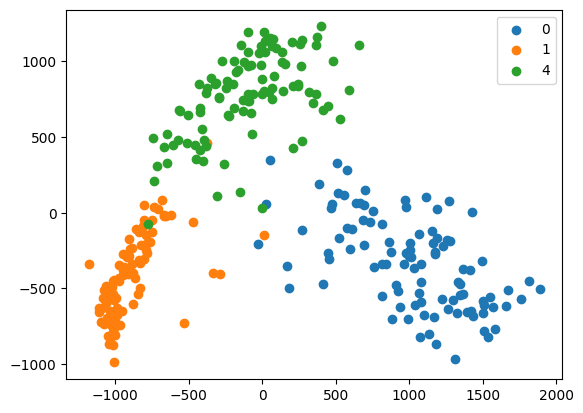

In [35]:
# We select 100 images each for digit 0, 1, 4 (these digits are easily separable from PCA plot)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
n_pts_per_class = 100
selected_class = [0, 1, 4]
x = np.concatenate([x_train[np.where(y_train == c)[0][:n_pts_per_class]]
                    for c in selected_class], axis=0)
# The true labels for the selected 300 images
y = np.repeat(selected_class, n_pts_per_class)
x = x.reshape(len(y), -1)

# Since x.shape = (300, 784), it is hard to visualize a 784 vector; we use PCA to reduce 784-dimentional to 2-D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pc = pca.fit_transform(x)
for c in selected_class:
  plt.scatter(x_pc[y==c, 0], x_pc[y==c, 1], label=c)
plt.legend()
plt.show()

# Run KMeans a few times to cluster these digits and observe the results

In [36]:
from sklearn.metrics import adjusted_mutual_info_score
num_runs = 5
adj_mi_list = []
for _ in range(num_runs):
  # This is where you call KMeans to get the clustering result
  labels = KMeans(x, n_clusters=3)
  # Since we know the ground truth labels, we can measure how good our clustering result is.
  adj_mi = adjusted_mutual_info_score(labels_true=y, labels_pred=labels)
  adj_mi_list.append(adj_mi)
  plt.scatter(x_pc[:, 0], x_pc[:, 1], c=labels)
  plt.title(f'Adjusted Mutual Information Score: {adj_mi}')
  plt.show()

(300,)


AttributeError: ignored

In [ ]:
print(adj_mi_list)

[0.8818520736171659, 0.8818520736171661, 0.8774417566291, 0.8818520736171661, 0.8818520736171661]


## Pause and think: why does KMeans return different results each run?